In [30]:
# Import libraries for data handling, preprocessing, PCA, and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")  # Suppress warnings for clean output

In [31]:
# Load the unclean dataset
df = pd.read_csv('train2.csv')

# Initial overview: Shape, info, and sample data
print("Dataset Shape:", df.shape)
df.info()  # Data types and non-null counts


Dataset Shape: (6000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6000 non-null   object 
 1   Item_Weight                4994 non-null   float64
 2   Item_Fat_Content           6000 non-null   object 
 3   Item_Visibility            6000 non-null   float64
 4   Item_Type                  6000 non-null   object 
 5   Item_MRP                   6000 non-null   float64
 6   Outlet_Identifier          6000 non-null   object 
 7   Outlet_Establishment_Year  6000 non-null   int64  
 8   Outlet_Size                4289 non-null   object 
 9   Outlet_Location_Type       6000 non-null   object 
 10  Outlet_Type                6000 non-null   object 
 11  Item_Outlet_Sales          6000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 562.6+ KB


In [32]:
print("\nSample Data (first 10 rows):")
df.head(10)  # Shorter for readability; use screenshot for full 50 if needed


Sample Data (first 10 rows):


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-69.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.23
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.09
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,MEdium,Tier 1,Supermarket Type1,7.65
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,6.60
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.90
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,MEDIUM,Tier 3,Supermarket Type2,6.32
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,5.84
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,MEdium,Tier 3,Supermarket Type3,8.30
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,6.98
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,8.46


In [33]:
# Uniques loop for EDA: Identify inconsistencies/outliers/missings
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("---------------")


Unique Values per Column:
Column: Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCX17' 'FDH31' 'FDX13']
---------------
Column: Item_Weight
[-6.93000000e+01  5.92000000e+00  1.75000000e+01  1.92000000e+01
  8.93000000e+00  1.03950000e+01  1.36500000e+01             nan
  1.62000000e+01  1.18000000e+01  1.85000000e+01 -1.58000000e+01
  1.76000000e+01  1.63500000e+01  9.00000000e+00  1.33500000e+01
  1.88500000e+01  1.46000000e+01  1.38500000e+01  1.30000000e+01
  7.64500000e+00  1.16500000e+01  5.92500000e+00  1.92500000e+01
  1.86000000e+01  1.87000000e+01  1.78500000e+01  1.00000000e+01
  8.85000000e+00  9.80000000e+00  1.36000000e+01  5.00000000e+06
  1.21500000e+01  6.42000000e+00  1.96000000e+01  1.58500000e+01
  7.39000000e+00  1.01950000e+01  9.89500000e+00  1.08950000e+01
  7.90500000e+00  9.19500000e+00  8.36500000e+00  1.51000000e+01
  7.97000000e+00  1.77000000e+01  1.93500000e+01  8.64500000e+00
  1.56000000e+01  8.19299290e+07  1.82500000e+01  7.85500000e+00
  7.82500000e+

In [34]:
#solve first problem inconsistent categories
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({
    "LF": "Low Fat",
    "low fat": "Low Fat",
    "reg": "Regular"
})

df["Outlet_Size"] = df["Outlet_Size"].replace({"MEdium": "Medium"})
df["Outlet_Size"] = df["Outlet_Size"].replace({"MEDIUM": "Medium"})
df["Outlet_Size"] = df["Outlet_Size"].replace({"HIGH": "High"})
df["Outlet_Size"] = df["Outlet_Size"].replace({"SMall": "Small"})
df["Outlet_Size"] = df["Outlet_Size"].replace({"SMALL": "Small"})
df["Outlet_Size"] = df["Outlet_Size"].replace({"sMALL": "Small"})

print("Categories fixed! Check uniques:")
print("Fat_Content uniques:", df['Item_Fat_Content'].unique())
print("Outlet_Size uniques:", df['Outlet_Size'].unique())

Categories fixed! Check uniques:
Fat_Content uniques: ['Low Fat' 'Regular']
Outlet_Size uniques: ['Medium' nan 'High' 'Small']


In [35]:
# Sanity check: Verify column names (no extra spaces/casing issues)
print("Column Names:")
print(df.columns.tolist())

Column Names:
['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']


Boxplots for Numeric Columns (Before Full Cleaning):


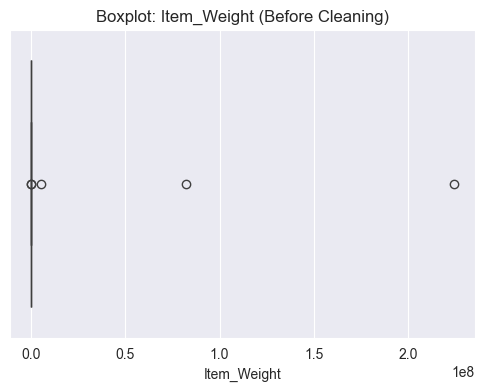

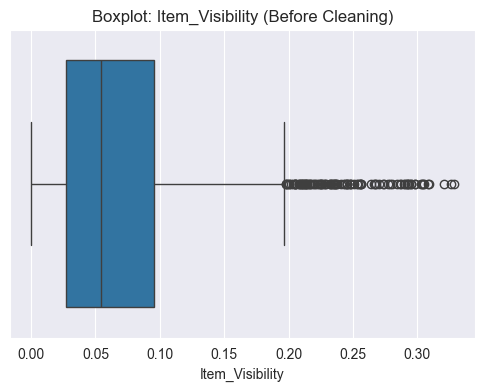

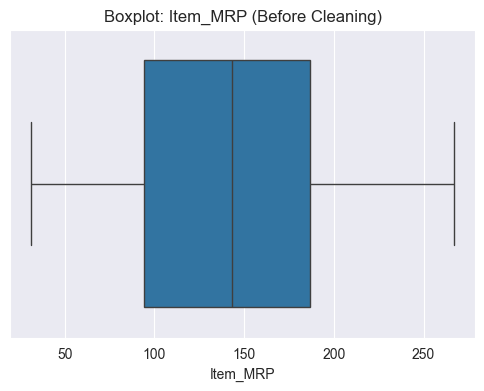

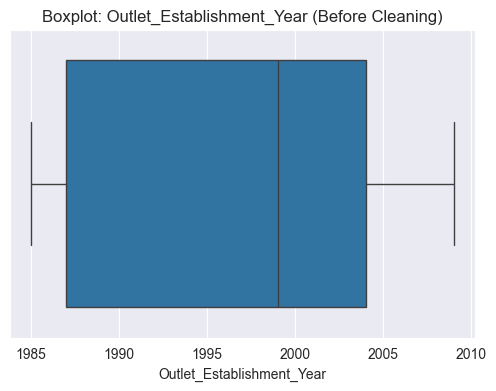

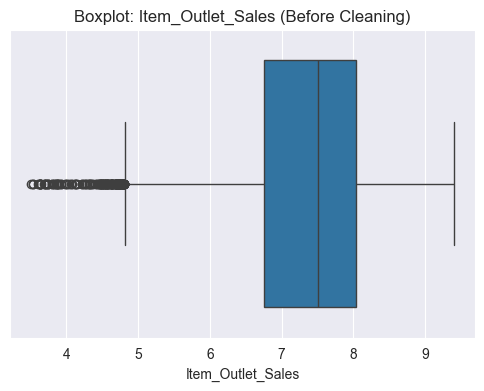

Boxplots saved in 'plots/' folder!


In [36]:
# Step 2: Visualize numeric outliers with boxplots (pre-cleaning inspection) – Save to folder
print("Boxplots for Numeric Columns (Before Full Cleaning):")

# Create 'plots' folder for saving graphs
os.makedirs('plots', exist_ok=True)

for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot: {i} (Before Cleaning)')
    plt.savefig(f'plots/boxplot_{i}.png', dpi=300, bbox_inches='tight')  # Save high-res
    plt.show()
    plt.close()  # Close to free memory

print("Boxplots saved in 'plots/' folder!")

In [37]:
#Solving missing values
df["Item_Weight"] = df.groupby("Item_Identifier")["Item_Weight"].transform(
    lambda x: x.fillna(x.mean())
)
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())

df["Outlet_Size"] = df.groupby("Outlet_Type")["Outlet_Size"].transform(
    lambda x: x.fillna(x.mode()[0] if len(x.mode()) > 0 else "Medium")
)

In [38]:
# Validation: Check missings after imputation
print("Missings after imputation:")
print(df.isnull().sum())

Missings after imputation:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [39]:
print("\nSample after imputation (first 10 rows):")
df.head(10)


Sample after imputation (first 10 rows):


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-69.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.23
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.09
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.65
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.60
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.90
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.32
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,5.84
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,8.30
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,6.98
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,8.46


In [40]:
#fix the inconsistant zero value on the column "Item_visibility"
mean_vis = df["Item_Visibility"].mean()
df.loc[df["Item_Visibility"] == 0, "Item_Visibility"] = mean_vis
print("Inconsistent zero values in 'Item_Visibility' fixed!")

Inconsistent zero values in 'Item_Visibility' fixed!


In [41]:
#discover negative columns 
for col in df.columns:
    if df[col].dtype != "object":
        negatives = df[df[col] < 0]
        if len(negatives) > 0:
            print(f"Negative values found in: {col}")
            print(negatives[col])
            print("\n")


Negative values found in: Item_Weight
0    -69.3
12   -15.8
Name: Item_Weight, dtype: float64




In [42]:
#solving the negatives items on the weights
df["Item_Weight"] = df["Item_Weight"].abs()
print("Negative values in 'Item_Weight' fixed to absolute values!")

Negative values in 'Item_Weight' fixed to absolute values!


In [43]:
#insure we don't have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6000 non-null   object 
 1   Item_Weight                6000 non-null   float64
 2   Item_Fat_Content           6000 non-null   object 
 3   Item_Visibility            6000 non-null   float64
 4   Item_Type                  6000 non-null   object 
 5   Item_MRP                   6000 non-null   float64
 6   Outlet_Identifier          6000 non-null   object 
 7   Outlet_Establishment_Year  6000 non-null   int64  
 8   Outlet_Size                6000 non-null   object 
 9   Outlet_Location_Type       6000 non-null   object 
 10  Outlet_Type                6000 non-null   object 
 11  Item_Outlet_Sales          6000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 562.6+ KB


In [44]:
X=df.drop(columns=['Item_Outlet_Sales'])

In [45]:
#Discover outliers
num_cols = X.select_dtypes(include=["float64", "int64"]).columns

for col in num_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = X[(X[col] < lower) | (X[col] > upper)]
    
    print("="*60)
    print(f" Outliers in column: {col}")
    print(f"Lower Bound: {lower:.2f}, Upper Bound: {upper:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    print(outliers[[col]].head())  # Display sample


 Outliers in column: Item_Weight
Lower Bound: -3.41, Upper Bound: 29.41
Number of outliers: 25
      Item_Weight
0    6.930000e+01
43   5.000000e+06
71   8.192993e+07
186  7.215244e+04
300  7.215244e+04
 Outliers in column: Item_Visibility
Lower Bound: -0.06, Upper Bound: 0.19
Number of outliers: 114
     Item_Visibility
49          0.255395
65          0.195068
83          0.293418
108         0.278974
174         0.291865
 Outliers in column: Item_MRP
Lower Bound: -44.69, Upper Bound: 325.25
Number of outliers: 0
Empty DataFrame
Columns: [Item_MRP]
Index: []
 Outliers in column: Outlet_Establishment_Year
Lower Bound: 1961.50, Upper Bound: 2029.50
Number of outliers: 0
Empty DataFrame
Columns: [Outlet_Establishment_Year]
Index: []


In [46]:
#clipping to solve the item_visibility outliers
#clipping to solve the item_weight outliers

def fix_outliers(col):
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    X[col] = np.clip(X[col], lower, upper)

fix_outliers("Item_Weight")
fix_outliers("Item_Visibility")

In [47]:
# Create folder for processed data
os.makedirs('processed_data', exist_ok=True)
print("Processed data folder created: 'processed_data/'")

# Save the full cleaned df
df.to_csv('processed_data/cleaned_data.csv', index=False)
print("Cleaned data saved as 'processed_data/cleaned_data.csv' – Shape:", df.shape)
print("Load later: pd.read_csv('processed_data/cleaned_data.csv')")


Processed data folder created: 'processed_data/'
Cleaned data saved as 'processed_data/cleaned_data.csv' – Shape: (6000, 12)
Load later: pd.read_csv('processed_data/cleaned_data.csv')


In [48]:
categorical_cols = X.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in categorical_cols:
    X[col + '_Encoded'] = le.fit_transform(X[col])

In [49]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_Encoded,Item_Fat_Content_Encoded,Item_Type_Encoded,Outlet_Identifier_Encoded,Outlet_Size_Encoded,Outlet_Location_Type_Encoded,Outlet_Type_Encoded
0,FDA15,29.4075,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,156,0,4,9,1,0,1
1,DRC01,5.9200,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,8,1,14,3,1,2,2
2,FDN15,17.5000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,661,0,10,9,1,0,1
3,FDX07,19.2000,Regular,0.066333,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,1119,1,6,0,2,2,0
4,NCD19,8.9300,Low Fat,0.066333,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,1295,0,9,1,0,2,1


In [50]:
X = X.drop(columns=categorical_cols)


In [51]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_Encoded,Item_Fat_Content_Encoded,Item_Type_Encoded,Outlet_Identifier_Encoded,Outlet_Size_Encoded,Outlet_Location_Type_Encoded,Outlet_Type_Encoded
0,29.4075,0.016047,249.8092,1999,156,0,4,9,1,0,1
1,5.9200,0.019278,48.2692,2009,8,1,14,3,1,2,2
2,17.5000,0.016760,141.6180,1999,661,0,10,9,1,0,1
3,19.2000,0.066333,182.0950,1998,1119,1,6,0,2,2,0
4,8.9300,0.066333,53.8614,1987,1295,0,9,1,0,2,1


In [52]:
print(X.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier_Encoded',
       'Item_Fat_Content_Encoded', 'Item_Type_Encoded',
       'Outlet_Identifier_Encoded', 'Outlet_Size_Encoded',
       'Outlet_Location_Type_Encoded', 'Outlet_Type_Encoded'],
      dtype='object')


In [53]:
# Validation: Check missings after imputation
print("Missings after imputation:")
print(X.isnull().sum())

Missings after imputation:
Item_Weight                     0
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Identifier_Encoded         0
Item_Fat_Content_Encoded        0
Item_Type_Encoded               0
Outlet_Identifier_Encoded       0
Outlet_Size_Encoded             0
Outlet_Location_Type_Encoded    0
Outlet_Type_Encoded             0
dtype: int64


In [54]:
#Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)

In [57]:
# 1. Subtract mean from the normalized features
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# 2. Covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# 3. Calculate the eigen vectors and eigen values of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix) 

# 4. Sort eigenvectors by decreasing eigenvalues
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# 5. Choose top 8 components
n_components = 8
top_eigenvectors = eigenvectors[:, :n_components]

# 6. Project data onto principal components
X_pca = np.dot(X_centered, top_eigenvectors)

# 7. variance ratio
variance_ratio = eigenvalues[:n_components] / np.sum(eigenvalues)
print(" variance ratio:", variance_ratio)

 variance ratio: [0.20913334 0.11896921 0.10899091 0.09825252 0.09265126 0.09207254
 0.08739013 0.07348209]


2D projection saved as 'pca_plots/pca_2d_projection.png'!


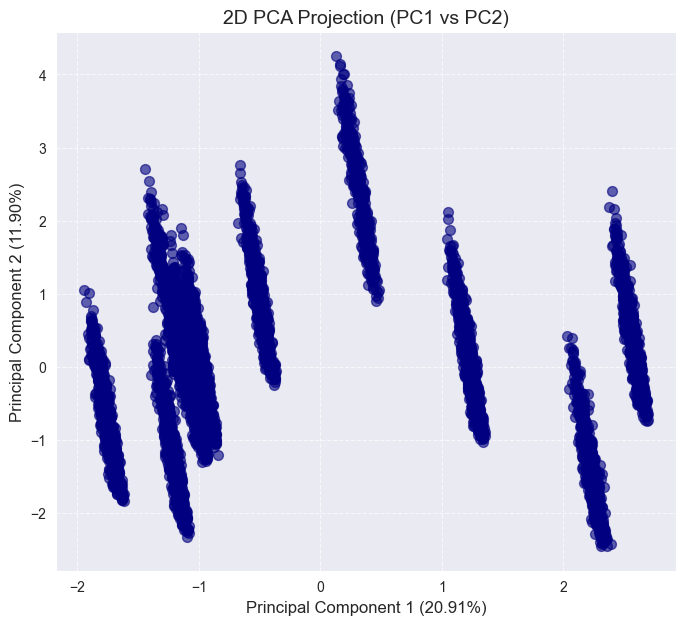

3D projection saved as 'pca_plots/pca_3d_projection.png'!


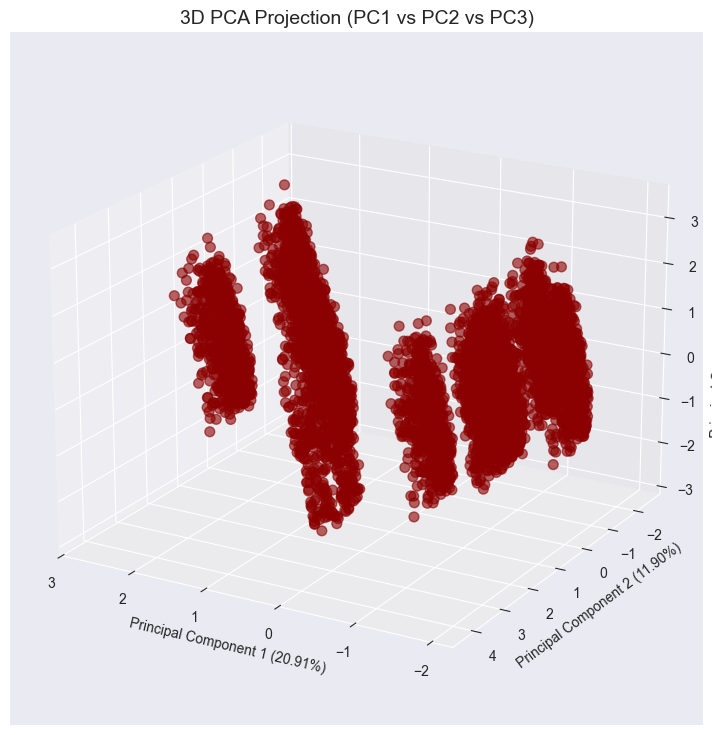

PCA projections saved! Ready for report screenshots.


In [58]:
# Ensure folder exists
os.makedirs('pca_plots', exist_ok=True)

# 2D PCA Projection (original code)
plt.figure(figsize=(8, 7))

# X_pca[:, 0]   (PC1)
# X_pca[:, 1]  (PC2)
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            alpha=0.6,
            c='navy',
            s=50)
plt.xlabel(f'Principal Component 1 ({variance_ratio[0]*100:.2f}%)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({variance_ratio[1]*100:.2f}%)', fontsize=12)
plt.title('2D PCA Projection (PC1 vs PC2)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Save 2D plot
plt.savefig('pca_plots/pca_2d_projection.png', dpi=300, bbox_inches='tight')
print("2D projection saved as 'pca_plots/pca_2d_projection.png'!")

plt.show()

# 3D PCA Projection (original code)
fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(111, projection='3d')

# X_pca[:, 2]    (PC3)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
           alpha=0.6,
           c='darkred',
           s=50)
ax.set_xlabel(f'Principal Component 1 ({variance_ratio[0]*100:.2f}%)')
ax.set_ylabel(f'Principal Component 2 ({variance_ratio[1]*100:.2f}%)')
ax.set_zlabel(f'Principal Component 3 ({variance_ratio[2]*100:.2f}%)')
ax.set_title('3D PCA Projection (PC1 vs PC2 vs PC3)', fontsize=14)
ax.view_init(elev=20, azim=120)

# Save 3D plot
plt.savefig('pca_plots/pca_3d_projection.png', dpi=300, bbox_inches='tight')
print("3D projection saved as 'pca_plots/pca_3d_projection.png'!")

plt.show()

print("PCA projections saved! Ready for report screenshots.")
